In [24]:
### IMPORT PACKAGES
import pandas as pd
import numpy as np
from os import chdir
from scipy.optimize import minimize

In [2]:
def model(x_p, w):
    y = w[0] + np.dot(x_p,w[1:])
    return y

In [30]:
np.linalg.norm(g(initial_w,x,y))

3.0363399523521735

In [31]:
def g(w,x,y):
    cost = 0
    P = len(y)
    for p in range(P):
        cost += (model(x[p],w) - y[p]) ** 2
    return cost/P

In [18]:
## IMPORT FILE

data = np.loadtxt("P:\student_debt_data.csv", delimiter=',')
data

array([[2.0042e+03, 2.0045e+03, 2.0048e+03, 2.0050e+03, 2.0052e+03,
        2.0055e+03, 2.0058e+03, 2.0060e+03, 2.0062e+03, 2.0065e+03,
        2.0068e+03, 2.0070e+03, 2.0072e+03, 2.0075e+03, 2.0078e+03,
        2.0080e+03, 2.0082e+03, 2.0085e+03, 2.0088e+03, 2.0090e+03,
        2.0092e+03, 2.0095e+03, 2.0098e+03, 2.0100e+03, 2.0102e+03,
        2.0105e+03, 2.0108e+03, 2.0110e+03, 2.0112e+03, 2.0115e+03,
        2.0118e+03, 2.0120e+03, 2.0122e+03, 2.0125e+03, 2.0128e+03,
        2.0130e+03, 2.0132e+03, 2.0135e+03, 2.0138e+03, 2.0140e+03],
       [2.6000e-01, 2.6000e-01, 3.3000e-01, 3.5000e-01, 3.6000e-01,
        3.7000e-01, 3.8000e-01, 3.9000e-01, 4.3000e-01, 4.4000e-01,
        4.5000e-01, 4.8000e-01, 5.1000e-01, 5.1000e-01, 5.3000e-01,
        5.5000e-01, 5.8000e-01, 5.9000e-01, 6.1000e-01, 6.4000e-01,
        6.6000e-01, 6.8000e-01, 6.9000e-01, 7.2000e-01, 7.6000e-01,
        7.6000e-01, 7.8000e-01, 8.1000e-01, 8.1000e-01, 8.5000e-01,
        8.7000e-01, 8.7000e-01, 9.0000e-01, 9.1

In [22]:
x,y = data
len(x),len(y)

(40, 40)

In [32]:
# Initial guess for w
initial_w = np.zeros(len(x) + 1)

# Optimization
result = minimize(fun=g, x0=initial_w, args=(x, y), method='BFGS')

optimal_w = result.x
print("Optimal weights:", optimal_w)

Optimal weights: [-1.53693677e+02  7.68222685e-02  7.68223494e-02  7.68228820e-02
  7.68225872e-02  7.68231270e-02  7.68223275e-02  7.68227325e-02
  7.68225823e-02  7.68224730e-02  7.68227306e-02  7.68224611e-02
  7.68225260e-02  7.68250287e-02  7.68221073e-02  7.68228526e-02
  7.68225051e-02  7.68212224e-02  7.68225356e-02  7.68223461e-02
  7.68228715e-02  7.68223606e-02  7.68229370e-02  7.68224337e-02
  7.68228268e-02  7.68226789e-02  7.68227087e-02  7.68226950e-02
  7.68227721e-02  7.68210667e-02  7.68224359e-02  7.68225889e-02
  7.68226684e-02  7.68226998e-02  7.68227999e-02  7.68226529e-02
  7.68221259e-02  7.68227512e-02  7.68225606e-02  7.68224674e-02
  7.68251793e-02]


In [35]:
print(g(initial_w,x,y))
print(g(optimal_w,x,y))

3.0363399523521735
0.0018169356369045597


# Otimização Manual

In [41]:
P = len(x)
# Criar matriz A
At = np.array([np.ones(P),x])
A = At.transpose()
M = np.matmul(At,A)
print(M.shape)
b = np.matmul(At,y)
print(b.shape)
w = np.linalg.solve(M,b)
w

(2, 2)
(2,)


array([-1.60729045e+02,  8.03244175e-02])

# Visualização

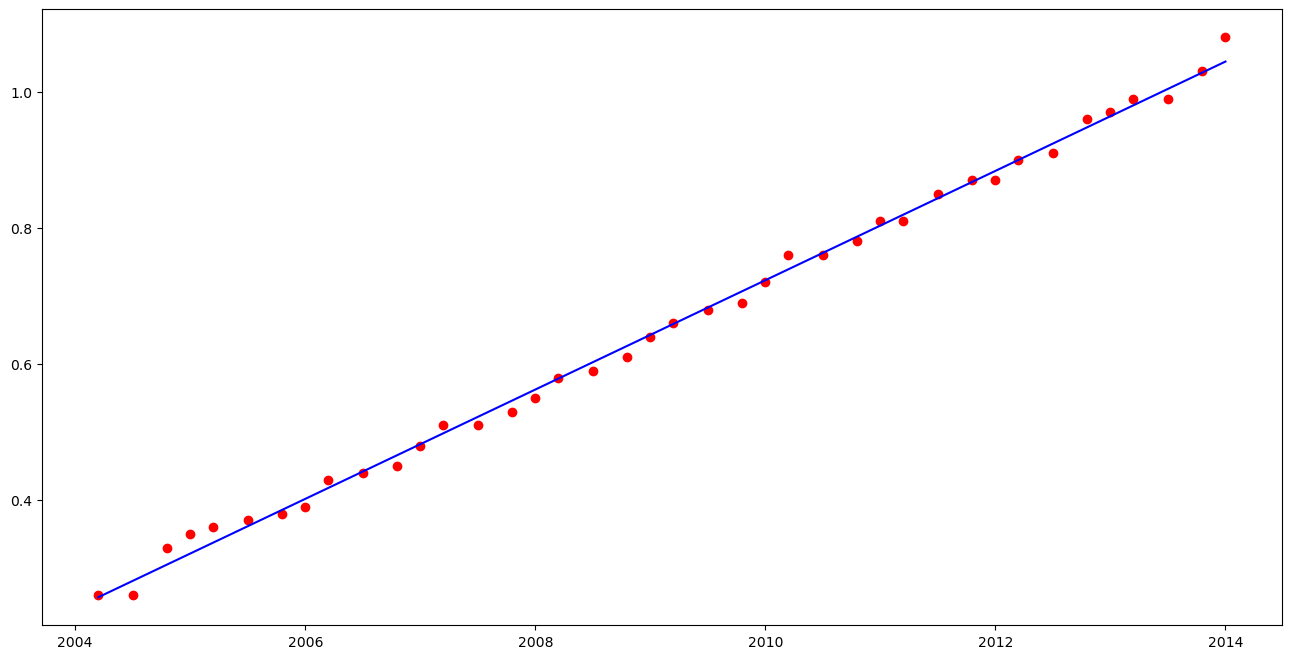

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.scatter(x,y,c='red')

X = np.linspace(x[0],x[-1],100)
Y = X * w[1] + w[0]
plt.plot(X,Y,c='blue')
plt.show()

In [52]:
g(w,x,y)

0.00018305954521609906